# CASTEP

Results from performance tests of the material property code [CASTEP](http://www.castep.org/) using CASTEP-provided benchmarks:
- Small benchmark: [TiN](http://www.castep.org/CASTEP/TiN)
  > a 32-atom TiN surface, with an adsorbed H atom and a vacuum gap. There are 8 k-points, so it should scale well to 8 cores; beyond that, it relies on CASTEP's other parallelisation strategies.
- Medium benchmark: [Al3x3](http://www.castep.org/CASTEP/Al3x3)
  > a 270-atom sapphire surface, with a vacuum gap. There are only 2 k-points, so it is a good test of the performance of CASTEP's other parallelisation strategies.
- Large benchmark: [DNA](/home/hpcbras1/hpc-tests/apps/castep/README.md)
  > a 1356-atom simulation of a DNA strand (poly-A) with counter-ions, in a large simulation box. There is only 1 k-point (the gamma-point), so, like the Crambin test, its parallel performance is reliant on CASTEP's other parallelisation strategies.

(descriptions from the CASTEP [benchmarks page](http://www.castep.org/CASTEP/Benchmarks))

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

Each benchmark is run on a range of number of nodes, from 1 up to all available. Each run uses as many mpi tasks (processes) per node as there are physical cores.

The plots show results for the most-recent run on each system/partition/environment combination, against the number of nodes used for each run. Parameters are:
- 'total_time' (s): Total time required for the simulation, as reported by CASTEP
- 'peak_mem' (kB): Peak memory usage, as reported by CASTEP
- 'parallel_efficienty' (%): Parallel efficiency, as reported by CASTEP
- 'runtime_real' (s): Wallclock time reported by `time` for entire MPI program start to finish (i.e. may include additional setup/teardown time not captured in 'total_time').


Castep_TiN: total_time


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,507.35,513.59


Castep_TiN: runtime_real


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,510.439,517.117


Castep_TiN: parallel_efficiency


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,98.0,98.0


Castep_Al3x3_*: total_time


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,568.39,552.17
2,319.84,301.65
4,228.11,281.69
8,205.31,295.76
16,221.51,364.38
32,254.16,452.16
56,294.13,6672.46


Castep_Al3x3_*: runtime_real


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,573.441,558.335
2,325.713,310.583
4,237.173,294.845
8,208.655,301.756
16,224.909,371.226
32,260.061,459.510
56,304.030,6678.015


Castep_Al3x3_*: parallel_efficiency


case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,70.0,70.0
2,65.0,70.0
4,55.0,45.0
8,39.0,28.0
16,28.0,15.0
32,19.0,9.0
56,14.0,1.0


Castep_DNA_*: total_time - No results found
Castep_DNA_*: runtime_real - No results found
Castep_DNA_*: parallel_efficiency - No results found


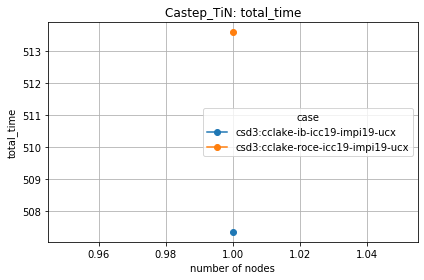

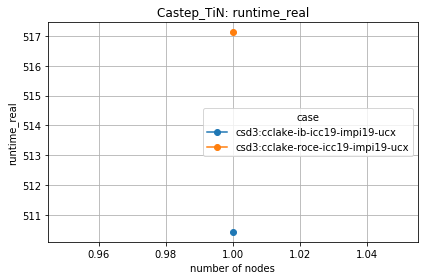

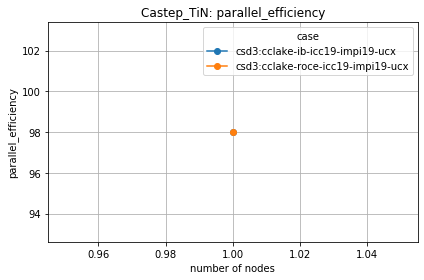

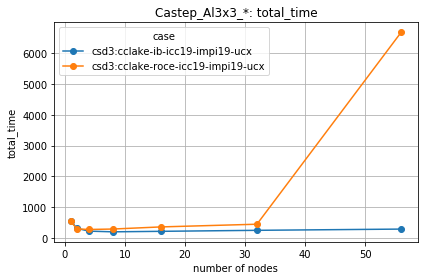

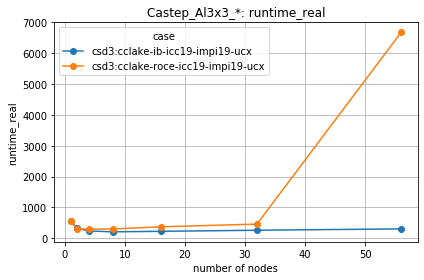

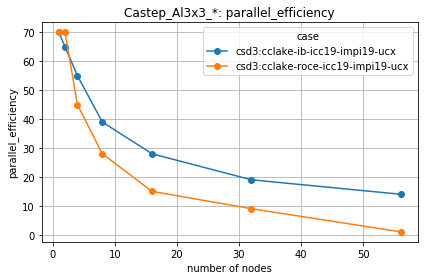

In [2]:
for test in ['Castep_TiN', 'Castep_Al3x3_*', 'Castep_DNA_*']:
    for perf_var in ['total_time', 'runtime_real', 'parallel_efficiency']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', perf_var)
        if df is None:
            print('%s: %s - No results found' % (test, perf_var))
            continue
        print('%s: %s' % (test, perf_var))
        display(df)
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(perf_var)
        ax.set_title('%s: %s' % (test, perf_var))
        plt.tight_layout()